In [20]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url
import os
import pathlib

temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

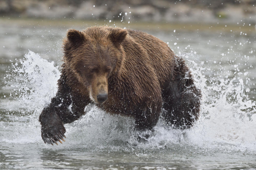

In [24]:
dest = 'grizzly.jpg'

im = Image.open(dest)
im.to_thumb(256,256)

In [25]:
learn_inf = load_learner('export.pkl')

In [27]:
learn_inf.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([7.6651e-08, 1.0000e+00, 2.5768e-08]))

In [28]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [29]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [30]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['grizzly.jpg'])

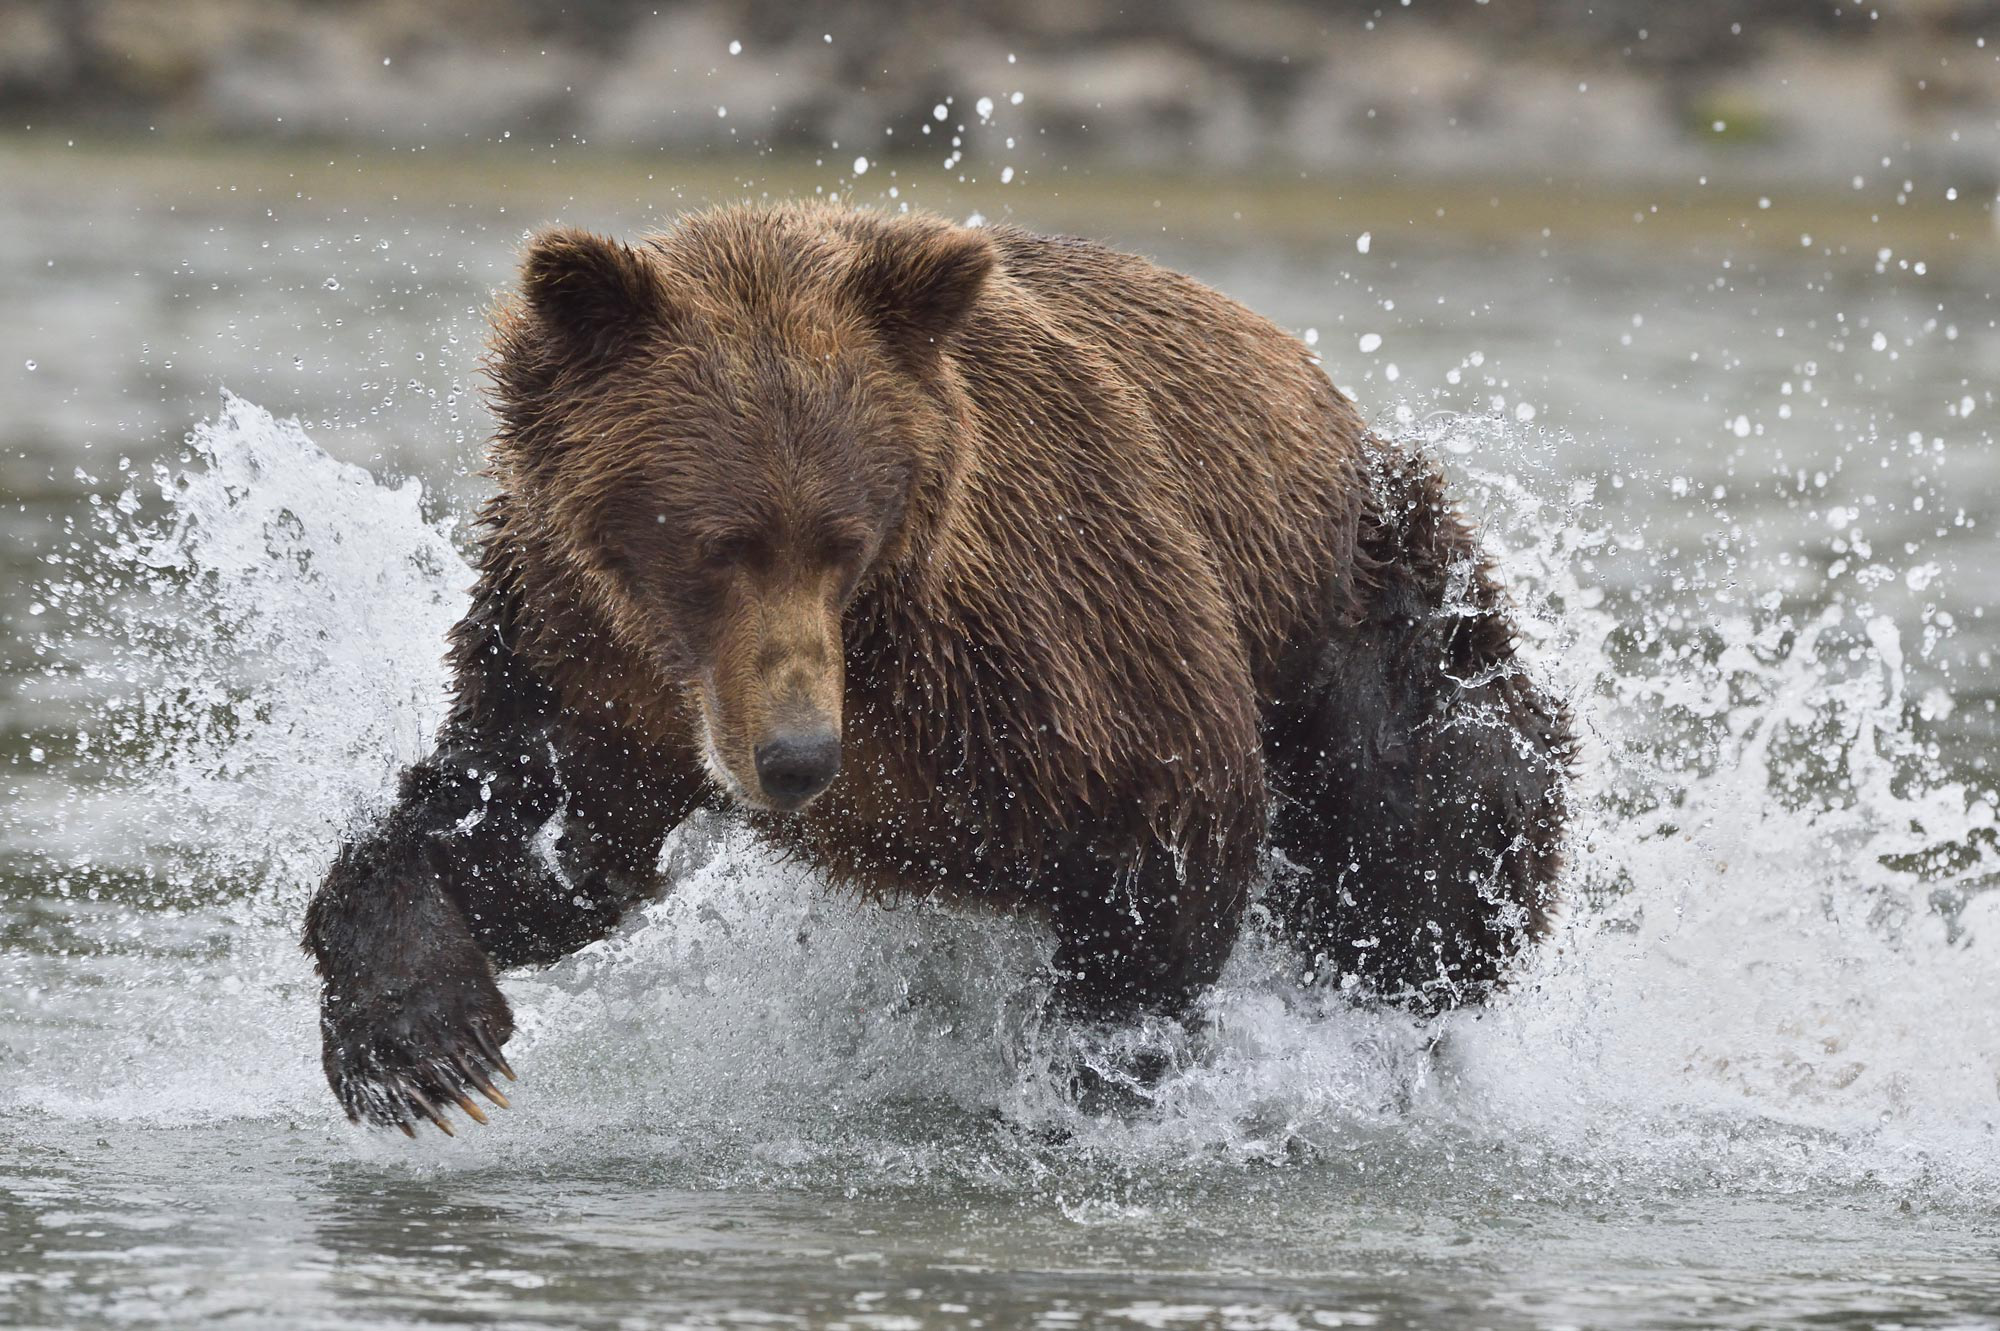

In [31]:
img = PILImage.create(btn_upload.data[-1])
img

In [32]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [35]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [38]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila